In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import re

In [3]:
# Model Opening
model_path = 'SIE+SHEAR+FIX'
model_ver = 'SIE_POS_SHEAR'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE+SHEAR+FIX/SIE_POS_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(2, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.30e+02, 20.80, 20.75, 0.107, 23.38, 0.000000e+00, 0.0)\n",
 "glafic.set_lens(2, 'pert', 0.261343256161012, 1.0, 20.90, 20.64, 0.02, 140.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_lens(2, 0, 0, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be don

In [4]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

2
1


In [6]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
lens_sie_line = next(line for line in reversed(opt_result) if 'lens   sie' in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[1:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.578910e+02  2.081329e+01  2.076512e+01  1.002482e-01  2.732969e+01  0.000000e+00  0.000000e+00 

point  1.0000  2.082080e+01  2.077732e+01 



['1.0000', '2.082080e+01', '2.077732e+01']

In [24]:
name = "'" + model_path + '/' + model_ver + "'"
name

"'SIE+SHEAR+FIX/SIE_POS_SHEAR'"

In [25]:
r1 = 0.03
r2 = 0.8
n = 1000
len_num = 1

# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, 'sie', {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.init(' in line:
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {name}, 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        elif 'glafic.kapparad(' in line:
            print('Found glafic.kapparad')
            line = f"glafic.kapparad({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        elif 'glafic.kappacum(' in line:
            print('Found glafic.kappacum')
            line = f"glafic.kappacum({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point
Found glafic.kapparad
Found glafic.kappacum


In [26]:
%run kappa_glafic.py

######## computing radial profile of kappa
 zs = 1.000000e+00,  lens id = 1,  step = 1000
 center = (2.082080e+01, 2.077732e+01),  range = [3.000000e-02, 8.000000e-01]
 output file name = SIE+SHEAR+FIX/SIE_POS_SHEAR_kaprad.dat

3.000000e-02 8.709767e+00
3.077000e-02 8.461725e+00
3.154000e-02 8.228332e+00
3.231000e-02 8.008252e+00
3.308000e-02 7.800314e+00
3.385000e-02 7.603489e+00
3.462000e-02 7.416865e+00
3.539000e-02 7.239630e+00
3.616000e-02 7.071062e+00
3.693000e-02 6.910513e+00
3.770000e-02 6.757400e+00
3.847000e-02 6.611199e+00
3.924000e-02 6.471433e+00
4.001000e-02 6.337672e+00
4.078000e-02 6.209524e+00
4.155000e-02 6.086630e+00
4.232000e-02 5.968664e+00
4.309000e-02 5.855326e+00
4.386000e-02 5.746341e+00
4.463000e-02 5.641456e+00
4.540000e-02 5.540438e+00
4.617000e-02 5.443070e+00
4.694000e-02 5.349153e+00
4.771000e-02 5.258503e+00
4.848000e-02 5.170948e+00
4.925000e-02 5.086329e+00
5.002000e-02 5.004497e+00
5.079000e-02 4.925313e+00
5.156000e-02 4.848648e+00
5.233000e-02 4.774

In [34]:
# Math for img positions 
x_cent = float(set_point_values[1])
y_cent = float(set_point_values[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)

pred_rad = np.sqrt((pred['x'] - x_cent)**2 + (pred['y'] - y_cent)**2)
pred['rad'] = pred_rad
pred


inset_x_lim_l = min(pred['rad']) - 0.01
inset_x_lim_u = max(pred['rad']) + 0.01

20.8208 20.77732


In [28]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

In [ ]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.001 for ph in percent_height]

inset_percent_height = [ph + 0.68 for ph in percent_height]


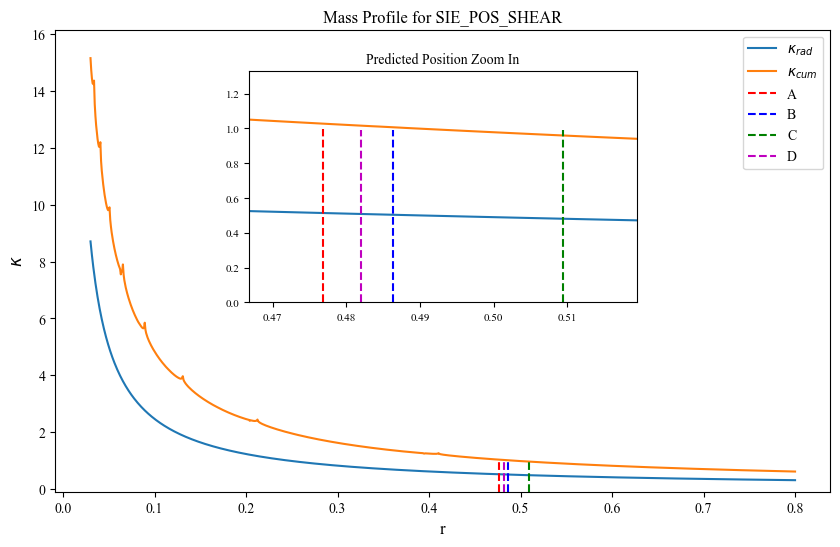

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=percent_height[0], ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=percent_height[1], ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=percent_height[2], ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=percent_height[3], ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 1)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="50%", height="50%", loc="upper center", borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(inset_x_lim_l, inset_x_lim_u)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=inset_percent_height[0], ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='C', ymax=inset_percent_height[1], ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='B', ymax=inset_percent_height[2], ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=inset_percent_height[3], ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.show()

In [ ]:
# Shear Plots
